# Up states: Stability of the neural subsystem

#### (With constant input current $I_{ext}$ in order to have a non-paradoxical fixed point.)

Soldado-Magraner, Seay, Laje & Buonomano (2022)  
Author: Rodrigo Laje

## Neural dynamics

### System's equations and fixed point (steady-state solution)

In [1]:
var('E,I')
var('W_EE,W_EI,W_IE,W_II')
var('g_E,g_I')
var('Theta_E,Theta_I,I_ext')
var('tau_E,tau_I')
var('dEdt,dIdt')
var('E_set,I_set');

Units are firing-rate models with ReLU activation functions (gain $g_X$ and threshold $\Theta_X$).  
We assume throughout this notebook that synaptic weights are fixed.  

For synaptic current values above threshold:

In [2]:
f_E = dEdt == (-E + g_E*(W_EE*E - W_EI*I - Theta_E + I_ext))/tau_E
f_I = dIdt == (-I + g_I*(W_IE*E - W_II*I - Theta_I))/tau_I
show(f_E)
show(f_I)

dEdt == ((E*W_EE - I*W_EI + I_ext - Theta_E)*g_E - E)/tau_E

dIdt == ((E*W_IE - I*W_II - Theta_I)*g_I - I)/tau_I

(There's a trivial fixed point at $E=I=0$ when the inputs to both subpopulations are subthreshold --> Down state).  
If activities are suprathreshold, there is a non-trivial fixed point known as the Up state:

In [3]:
neuralFixedPoint = solve([f_E.subs(dEdt==0),f_I.subs(dIdt==0)],E,I)
E_up = neuralFixedPoint[0][0]
I_up = neuralFixedPoint[0][1]

In [4]:
show(E_up)

E == (Theta_I*W_EI*g_I + (W_II*g_I + 1)*I_ext - (W_II*g_I + 1)*Theta_E)*g_E/((W_EI*W_IE*g_I - (W_II*g_I + 1)*W_EE)*g_E + W_II*g_I + 1)

In [5]:
show(I_up)

I == ((Theta_I*W_EE*g_I + I_ext*W_IE*g_I - Theta_E*W_IE*g_I)*g_E - Theta_I*g_I)/((W_EI*W_IE*g_I - (W_II*g_I + 1)*W_EE)*g_E + W_II*g_I + 1)

### Nulclines and phase space

In [6]:
E_null = solve(f_E.subs(dEdt==0),I)[0]
I_null = solve(f_I.subs(dIdt==0),I)[0]
show(E_null)
show(I_null)

I == ((E*W_EE + I_ext - Theta_E)*g_E - E)/(W_EI*g_E)

I == (E*W_IE - Theta_I)*g_I/(W_II*g_I + 1)

In [7]:
values_paradoxical = [g_E==1,g_I==4,E_set==5,I_set==14,Theta_E==4.8,Theta_I==25,I_ext==0,tau_E==10,tau_I==2]

In [8]:
values_nonparadoxical = [g_E==0.5,g_I==4,E_set==5,I_set==14,Theta_E==4.8,Theta_I==25,I_ext==8,tau_E==10,tau_I==2]

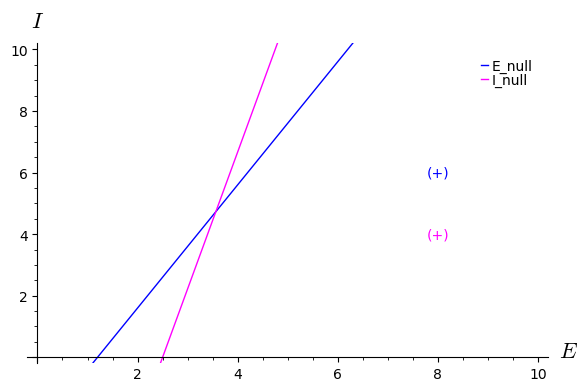

In [9]:
# comment out accordingly
W_XY0 = [W_EE==5,W_EI==2,W_IE==10,W_II==2] # paradoxical value (g_E=1)
values = values_paradoxical
#W_XY0 = [W_EE==1.5,W_EI==1,W_IE==15,W_II==2] # nonparadoxical value (g_E=0.5)
#values = values_nonparadoxical

probe = [E==8,I==5]
if dEdt.subs(f_E).subs(values).subs(W_XY0).subs(probe) > 0:
    E_vel = '(+)'
else:
    E_vel = '(-)'
if dIdt.subs(f_I).subs(values).subs(W_XY0).subs(probe) > 0:
    I_vel = '(+)'
else:
    I_vel = '(-)'
tt1 = text(E_vel,(E.subs(probe),I.subs(probe)+1),color='blue')
tt2 = text(I_vel,(E.subs(probe),I.subs(probe)-1),color='magenta')
E_max = 10
I_max = 10
fig1 = plot(I.subs(E_null).subs(values).subs(W_XY0),(E,0,E_max),legend_label='E_null',color='blue')
fig2 = plot(I.subs(I_null).subs(values).subs(W_XY0),(E,0,E_max),legend_label='I_null',color='magenta')
fig = fig1 + fig2 + tt1 + tt2
fig.xmin(0)
fig.xmax(E_max)
fig.ymin(0)
fig.ymax(I_max)
fig.axes_labels(['$E$', '$I$'])
fig.set_legend_options(loc='upper right',frameon=False)
#fig.save('neural_nullclines.pdf')
show(fig)

### Stability of the Up state fixed point

Assume the Up state exists (see next section), that is there is a combination of values $E$, $I$, $W_{XY}$ that satisfy equations $E_{up}$ and $I_{up}$ above.  
Conditions for the Up state to be linearly stable: all eigenvalues of the Jacobian matrix must have negative real part.  
If the neural subsystem is  
$\displaystyle \frac{dE}{dt} = f_E(E,I)$  
$\displaystyle \frac{dI}{dt} = f_I(E,I)$  

then the Jacobian matrix is  
$J_{neural} = \begin{pmatrix}
\displaystyle \frac{\partial f_E}{\partial E} & \displaystyle \frac{\partial f_E}{\partial I} \\
\displaystyle \frac{\partial f_I}{\partial E} & \displaystyle \frac{\partial f_I}{\partial I}
\end{pmatrix}
$  

In [10]:
J_neural = jacobian([f_E.rhs(),f_I.rhs()],(E,I))
show(J_neural)

[ (W_EE*g_E - 1)/tau_E       -W_EI*g_E/tau_E]
[       W_IE*g_I/tau_I -(W_II*g_I + 1)/tau_I]

Linear stability: the Up state is stable if the eigenvalues of the Jacobian evaluated at the Up state have negative real part. The Jacobian matrix is constant, thus its value is the same for any point (i.e. no need to evaluate).  

For a 2x2 matrix the eigenvalues are:  
$\lambda_{\pm} = \frac{1}{2}\left( \mathit{Tr} \pm \sqrt{\mathit{Tr}^2 - 4\mathit{Det}}\right)$  
where $\mathit{Tr}$ and $\mathit{Det}$ are the trace and determinant of the matrix, respectively:  
$\mathit{Tr} = \lambda_1 + \lambda_2$  
$\mathit{Det} =  \lambda_1 \lambda_2$  

- For complex eigenvalues the square root is imaginary and their real parts are $\frac{1}{2}\mathit{Tr}$. The stability condition is thus $\mathit{Tr}<0$.
- For real eigenvalues $\mathit{Tr}^2 - 4\mathit{Det}>0$. If in addition $\mathit{Det}>0$, then $|\mathit{Tr}| > \sqrt{\mathit{Tr}^2 - 4\mathit{Det}}$. If $\mathit{Tr}<0$ then $\mathit{Tr} \pm \sqrt{\mathit{Tr}^2 - 4\mathit{Det}} < 0$.  

In summary, for eigenvalues either complex or purely real, the real parts of both eigenvalues are negative if $\mathit{Tr}<0$ and $\mathit{Det}>0$.

In [11]:
J_det = J_neural[0,0]*J_neural[1,1] - J_neural[0,1]*J_neural[1,0]
J_tr = J_neural[0,0] + J_neural[1,1]
neural_stable_detcond = ((J_det>0) + (g_E*W_EE-1)*(g_I*W_II+1)/(tau_E*tau_I))*tau_E*tau_I
neural_stable_trcond = ((-J_tr>0) + (g_E*W_EE-1)/tau_E)*tau_I*tau_E
show(neural_stable_detcond)
show(neural_stable_trcond)

W_EI*W_IE*g_E*g_I > (W_EE*g_E - 1)*(W_II*g_I + 1)

(W_II*g_I + 1)*tau_E > (W_EE*g_E - 1)*tau_I

### Existence of the Up state fixed point

For the Up state to exist we need the values $E_{up}$ and $I_{up}$ to be positive.  
First note that their denominator must be positive because it is equivalent to the determinant condition above:

In [12]:
den = E.subs(E_up).denominator()
neural_stable_detcond_aux = neural_stable_detcond.lhs() - neural_stable_detcond.rhs() > 0
show(den)
show(neural_stable_detcond_aux)
show((den - neural_stable_detcond_aux.lhs()).expand())

W_EI*W_IE*g_E*g_I - W_EE*W_II*g_E*g_I - W_EE*g_E + W_II*g_I + 1

W_EI*W_IE*g_E*g_I - (W_EE*g_E - 1)*(W_II*g_I + 1) > 0

0

Then $E_{up}$ and $I_{up}$ must have positive numerators:

In [13]:
up_exist_cond_1 = ((E.subs(E_up).numerator() > 0)/g_E).expand() # divide by a positive number only
up_exist_cond_2 = ((I.subs(I_up).numerator() > 0)/g_I).expand()
show(up_exist_cond_1)
show(up_exist_cond_2)

Theta_I*W_EI*g_I + I_ext*W_II*g_I - Theta_E*W_II*g_I + I_ext - Theta_E > 0

Theta_I*W_EE*g_E + I_ext*W_IE*g_E - Theta_E*W_IE*g_E - Theta_I > 0

This conditions are equivalent to the positive determinant condition for the estability of the fixed point (see below).

### Weight values as a function of the Up-state activities

Given the activities $E_{set}$ and $I_{set}$, we can compute the weight values that are compatible with them, i.e. take $E=E(W_{XY})$ and $I=I(W_{XY})$ and solve for $W_{EI}$ and $W_{II}$ (since it is an underdetermined system, weights $W_{EE}$ and $W_{IE}$ are free)

In [14]:
[W_EIup,W_IIup] = solve([E_up.subs(E==E_set),I_up.subs(I==I_set)],W_EI,W_II)[0]
show(W_EIup)
show(W_IIup)

W_EI == ((E_set*W_EE + I_ext - Theta_E)*g_E - E_set)/(I_set*g_E)

W_II == ((E_set*W_IE - Theta_I)*g_I - I_set)/(I_set*g_I)

Both weights must have positive values:

In [15]:
positive_WEI_cond = solve(W_EI.subs(W_EIup)>0,W_EE)[0][2] # choose solution with positive I_set and g_I
show(positive_WEI_cond)

E_set*W_EE*g_E + I_ext*g_E - Theta_E*g_E - E_set > 0

In [16]:
positive_WII_cond = solve(W_II.subs(W_IIup)>0,W_IE)[0][2] # choose solution with positive E_set and g_E
show(positive_WII_cond)

E_set*W_IE*g_I - Theta_I*g_I - I_set > 0

### Paradoxical effect

The paradoxical effect arises when depolarization of the inhibitory subpopulation (increase of $I$, either produced by increased excitatory external input or increased excitatory drive from $E$) produces an actual _decrease_ of $I$. In this model, an external depolarization of $I$ can be mimicked by a decrease of its threshold $\Theta_I$, thus there is a paradoxical effect whenever the coefficient of $\Theta_I$ in the numerator of $I_{up}$ is positive.

Coefficient of inhibitory threshold $\Theta_I$ in $I_{up}$:

In [17]:
coeffThetaI = I_up.right().coefficient(Theta_I).factor()
show(coeffThetaI)

(W_EE*g_E - 1)*g_I/(W_EI*W_IE*g_E*g_I - W_EE*W_II*g_E*g_I - W_EE*g_E + W_II*g_I + 1)

Note that the denominator must be positive because it is exactly the first stability condition for the neural system:

In [18]:
neural_stable_detcond_v2 = neural_stable_detcond - (W_EE*g_E-1)*(W_II*g_I+1)
show(neural_stable_detcond)
show(neural_stable_detcond_v2)

W_EI*W_IE*g_E*g_I > (W_EE*g_E - 1)*(W_II*g_I + 1)

W_EI*W_IE*g_E*g_I - (W_EE*g_E - 1)*(W_II*g_I + 1) > 0

In [19]:
show(neural_stable_detcond_v2.left().expand())
show(coeffThetaI.denominator())
show(neural_stable_detcond_v2.left().expand() - coeffThetaI.denominator())

W_EI*W_IE*g_E*g_I - W_EE*W_II*g_E*g_I - W_EE*g_E + W_II*g_I + 1

W_EI*W_IE*g_E*g_I - W_EE*W_II*g_E*g_I - W_EE*g_E + W_II*g_I + 1

0

In [20]:
paradox_cond = coeffThetaI.numerator()/g_I > 0 # divide by a positive number only
show(paradox_cond)

W_EE*g_E - 1 > 0

### Region of stability

Rewrite all conditions in terms of the free weights $W_{EE}$ and $W_{IE}$

In [21]:
neural_stable_detcond_v2 = solve(neural_stable_detcond.subs([W_EIup,W_IIup]),W_IE)[1][2] # choose solution with positive g_I and I_set
neural_stable_trcond_v2 = solve(neural_stable_trcond.subs([W_EIup,W_IIup]),W_IE)[1][1] # choose solution with positive I_set
show(neural_stable_detcond_v2)
show(neural_stable_trcond_v2)

Theta_I*W_EE*g_E + I_ext*W_IE*g_E - Theta_E*W_IE*g_E - Theta_I > 0

E_set*W_IE*g_I*tau_E - I_set*W_EE*g_E*tau_I - Theta_I*g_I*tau_E + I_set*tau_I > 0

In [22]:
up_exist_cond_1_v2 = (up_exist_cond_1*I_set*g_E/(E_set*g_I)).subs([W_EIup,W_IIup]).factor()
up_exist_cond_2_v2 = up_exist_cond_2.subs([W_EIup,W_IIup]).factor()
up_exist_cond_2_v2_pos = (((up_exist_cond_2_v2 + Theta_I)/g_E - Theta_I*W_EE)/(I_ext - Theta_E)).factor() # if (I_ext-Theta_E)>0
up_exist_cond_2_v2_neg = (((up_exist_cond_2_v2 + Theta_I)/g_E - Theta_I*W_EE)/(Theta_E - I_ext)).factor() # if (I_ext-Theta_E)<0
show(up_exist_cond_1_v2)
show(up_exist_cond_2_v2)
show(up_exist_cond_2_v2_pos)
show(up_exist_cond_2_v2_neg)

(Theta_I*W_EE + (I_ext - Theta_E)*W_IE)*g_E - Theta_I > 0

(Theta_I*W_EE + (I_ext - Theta_E)*W_IE)*g_E - Theta_I > 0

W_IE > -(W_EE*g_E - 1)*Theta_I/((I_ext - Theta_E)*g_E)

-W_IE > (W_EE*g_E - 1)*Theta_I/((I_ext - Theta_E)*g_E)

Note that the conditions for the existence of the fixed point are equivalent to the positive determinant condition, so we'll not include them in the analysis.

#### Paradoxical conditions

Set of parameter values allowing a region of stability in the paradoxical regime only:

In [23]:
probe = [W_EE==5,W_IE==10]
positive_WEI_cond_border_pdx = solve(positive_WEI_cond.lhs()==positive_WEI_cond.rhs(),W_EE)[0].subs(values_paradoxical)
positive_WII_cond_border_pdx = solve(positive_WII_cond.lhs()==positive_WII_cond.rhs(),W_IE)[0].subs(values_paradoxical)
paradox_cond_border_pdx = solve(paradox_cond.left()==paradox_cond.right(),W_EE,W_IE)[0][0].subs(values_paradoxical)
neural_stable_detcond_v2_border_pdx = solve(neural_stable_detcond_v2.lhs()==0,W_IE)[0].subs(values_paradoxical)
neural_stable_trcond_v2_border_pdx = solve(neural_stable_trcond_v2.lhs()==0,W_IE)[0].subs(values_paradoxical)
if (I_ext-Theta_E).subs(values_paradoxical) > 0:
    up_exist_cond_2_v2_border_pdx = solve(up_exist_cond_2_v2_pos.lhs()-up_exist_cond_2_v2_pos.rhs()==0,W_IE)[0].subs(values_paradoxical)
else:
    up_exist_cond_2_v2_border_pdx = solve(up_exist_cond_2_v2_neg.lhs()-up_exist_cond_2_v2_neg.rhs()==0,W_IE)[0].subs(values_paradoxical)
print("PARADOXICAL CONDITIONS")
print("positive_WEI_cond:")
print("     ",positive_WEI_cond)
print("      border: ",positive_WEI_cond_border_pdx)
print("      probe: ",bool(positive_WEI_cond.subs(values_paradoxical).subs(probe)))
print("positive_WII_cond:")
print("     ",positive_WII_cond)
print("      border: ",positive_WII_cond_border_pdx)
print("      probe: ",bool(positive_WII_cond.subs(values_paradoxical).subs(probe)))
print("paradox_cond:")
print("     ",paradox_cond)
print("      border: ",paradox_cond_border_pdx)
print("      probe: ",bool(paradox_cond.subs(values_paradoxical).subs(probe)))
print("neural_stable_detcond_v2:")
print("     ",neural_stable_detcond_v2)
print("      border: ",neural_stable_detcond_v2_border_pdx)
print("      probe: ",bool(neural_stable_detcond_v2.subs(values_paradoxical).subs(probe)))
print("neural_stable_trcond_v2:")
print("     ",neural_stable_trcond_v2)
print("      border: ",neural_stable_trcond_v2_border_pdx)
print("      probe: ",bool(neural_stable_trcond_v2.subs(values_paradoxical).subs(probe)))
if (I_ext-Theta_E).subs(values_paradoxical) > 0:
    print("up_exist_cond_2_v2_pos:")
    print("     ",up_exist_cond_2_v2_pos)
    print("      border: ",up_exist_cond_2_v2_border_pdx)
    print("      probe: ",bool(up_exist_cond_2_v2_pos.subs(values_paradoxical).subs(probe)))
else:
    print("up_exist_cond_2_v2_neg:")
    print("     ",up_exist_cond_2_v2_neg)
    print("      border: ",up_exist_cond_2_v2_border_pdx)
    print("      probe: ",bool(up_exist_cond_2_v2_neg.subs(values_paradoxical).subs(probe)))

PARADOXICAL CONDITIONS
positive_WEI_cond:
      E_set*W_EE*g_E + I_ext*g_E - Theta_E*g_E - E_set > 0
      border:  W_EE == 1.96000000000000
      probe:  True
positive_WII_cond:
      E_set*W_IE*g_I - Theta_I*g_I - I_set > 0
      border:  W_IE == (57/10)
      probe:  True
paradox_cond:
      W_EE*g_E - 1 > 0
      border:  W_EE == 1
      probe:  True
neural_stable_detcond_v2:
      Theta_I*W_EE*g_E + I_ext*W_IE*g_E - Theta_E*W_IE*g_E - Theta_I > 0
      border:  W_IE == 5.20833333333333*W_EE - 5.20833333333333
      probe:  True
neural_stable_trcond_v2:
      E_set*W_IE*g_I*tau_E - I_set*W_EE*g_E*tau_I - Theta_I*g_I*tau_E + I_set*tau_I > 0
      border:  W_IE == 7/50*W_EE + 243/50
      probe:  True
up_exist_cond_2_v2_neg:
      -W_IE > (W_EE*g_E - 1)*Theta_I/((I_ext - Theta_E)*g_E)
      border:  W_IE == 5.20833333333333*W_EE - 5.20833333333333
      probe:  True


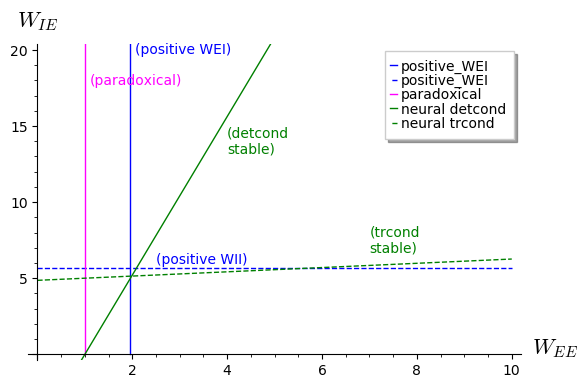

In [24]:
W_EE_max = 10
fig1 = line([[W_EE.subs(positive_WEI_cond_border_pdx),0],[W_EE.subs(positive_WEI_cond_border_pdx),50]],color='blue',linestyle='-',legend_label='positive_WEI')
fig2 = line([[0,W_IE.subs(positive_WII_cond_border_pdx)],[W_EE_max,W_IE.subs(positive_WII_cond_border_pdx)]],color='blue',linestyle='--',legend_label='positive_WEI')
fig3 = line([[W_EE.subs(paradox_cond_border_pdx),0],[W_EE.subs(paradox_cond_border_pdx),50]],color='magenta',legend_label='paradoxical')
fig4 = plot(W_IE.subs(neural_stable_detcond_v2_border_pdx),(W_EE,0,W_EE_max),ymin=0,color='green',linestyle='-',legend_label='neural detcond')
fig5 = plot(W_IE.subs(neural_stable_trcond_v2_border_pdx),(W_EE,0,W_EE_max),ymin=0,color='green',linestyle='--',legend_label='neural trcond')
tt1 = text('(positive WEI)', (0.1+W_EE.subs(positive_WEI_cond_border_pdx),20),color='blue',horizontal_alignment='left')
tt2 = text('(positive WII)', (2.5,0.5+W_IE.subs(positive_WII_cond_border_pdx)),color='blue',horizontal_alignment='left')
tt3 = text('(paradoxical)', (0.1+W_EE.subs(paradox_cond_border_pdx),18),color='magenta',horizontal_alignment='left')
tt4 = text('(detcond\nstable)', (4,14),color='green',horizontal_alignment='left')
tt5 = text('(trcond\nstable)', (7,7.5),color='green',horizontal_alignment='left')
fig = fig1 + fig2 + fig3 + fig4 + fig5 + tt1 + tt2 + tt3 + tt4 + tt5
fig.xmin(0)
fig.xmax(W_EE_max)
fig.ymin(0)
fig.ymax(20)
fig.axes_labels(['$W_{EE}$', '$W_{IE}$'])
fig.set_legend_options(loc='upper right')
#fig.save('neural_paradox_stability.pdf')
show(fig)

In the plot above the stability region of the neural subsystem (triangular area between green lines in the upper right quadrant) lies completely within the paradoxical regime (right of the magenta line). In addition, it is completely within the positive-W$_{EI}$ region (right of the solid blue line) and the positive-$W_{II}$ region (above the dashed blue line).

#### Non-paradoxical conditions

Set of parameter values allowing a region of stability in the non-paradoxical regime:

In [25]:
probe = [W_EE==5,W_IE==10]
positive_WEI_cond_border_nonpdx = solve(positive_WEI_cond.lhs()==positive_WEI_cond.rhs(),W_EE)[0].subs(values_nonparadoxical)
positive_WII_cond_border_nonpdx = solve(positive_WII_cond.lhs()==positive_WII_cond.rhs(),W_IE)[0].subs(values_nonparadoxical)
paradox_cond_border_nonpdx = solve(paradox_cond.left()==paradox_cond.right(),W_EE,W_IE)[0][0].subs(values_nonparadoxical)
neural_stable_detcond_v2_border_nonpdx = solve(neural_stable_detcond_v2.lhs()==0,W_IE)[0].subs(values_nonparadoxical)
neural_stable_trcond_v2_border_nonpdx = solve(neural_stable_trcond_v2.lhs()==0,W_IE)[0].subs(values_nonparadoxical)
if (I_ext-Theta_E).subs(values_nonparadoxical) > 0:
    up_exist_cond_2_v2_border_nonpdx = solve(up_exist_cond_2_v2_pos.lhs()-up_exist_cond_2_v2_pos.rhs()==0,W_IE)[0].subs(values_nonparadoxical)
else:
    up_exist_cond_2_v2_border_nonpdx = solve(up_exist_cond_2_v2_neg.lhs()-up_exist_cond_2_v2_neg.rhs()==0,W_IE)[0].subs(values_nonparadoxical)
print("NONPARADOXICAL CONDITIONS")
print("positive_WEI_cond:")
print("     ",positive_WEI_cond)
print("      border: ",positive_WEI_cond_border_nonpdx)
print("      probe: ",bool(positive_WEI_cond.subs(values_nonparadoxical).subs(probe)))
print("positive_WII_cond:")
print("     ",positive_WII_cond)
print("      border: ",positive_WII_cond_border_nonpdx)
print("      probe: ",bool(positive_WII_cond.subs(values_nonparadoxical).subs(probe)))
print("paradox_cond:")
print("     ",paradox_cond)
print("      border: ",paradox_cond_border_nonpdx)
print("      probe: ",bool(paradox_cond.subs(values_nonparadoxical).subs(probe)))
print("neural_stable_detcond_v2:")
print("     ",neural_stable_detcond_v2)
print("      border: ",neural_stable_detcond_v2_border_nonpdx)
print("      probe: ",bool(neural_stable_detcond_v2.subs(values_nonparadoxical).subs(probe)))
print("neural_stable_trcond_v2:")
print("     ",neural_stable_trcond_v2)
print("      border: ",neural_stable_trcond_v2_border_nonpdx)
print("      probe: ",bool(neural_stable_trcond_v2.subs(values_nonparadoxical).subs(probe)))
if (I_ext-Theta_E).subs(values_nonparadoxical) > 0:
    print("up_exist_cond_2_v2_pos:")
    print("     ",up_exist_cond_2_v2_pos)
    print("      border: ",up_exist_cond_2_v2_border_pdx)
    print("      probe: ",bool(up_exist_cond_2_v2_pos.subs(values_nonparadoxical).subs(probe)))
else:
    print("up_exist_cond_2_v2_neg:")
    print("     ",up_exist_cond_2_v2_neg)
    print("      border: ",up_exist_cond_2_v2_border_pdx)
    print("      probe: ",bool(up_exist_cond_2_v2_neg.subs(values_nonparadoxical).subs(probe)))

NONPARADOXICAL CONDITIONS
positive_WEI_cond:
      E_set*W_EE*g_E + I_ext*g_E - Theta_E*g_E - E_set > 0
      border:  W_EE == 1.36000000000000
      probe:  True
positive_WII_cond:
      E_set*W_IE*g_I - Theta_I*g_I - I_set > 0
      border:  W_IE == (57/10)
      probe:  True
paradox_cond:
      W_EE*g_E - 1 > 0
      border:  W_EE == 2.00000000000000
      probe:  True
neural_stable_detcond_v2:
      Theta_I*W_EE*g_E + I_ext*W_IE*g_E - Theta_E*W_IE*g_E - Theta_I > 0
      border:  W_IE == -7.81250000000000*W_EE + 15.6250000000000
      probe:  True
neural_stable_trcond_v2:
      E_set*W_IE*g_I*tau_E - I_set*W_EE*g_E*tau_I - Theta_I*g_I*tau_E + I_set*tau_I > 0
      border:  W_IE == 0.0700000000000000*W_EE + 243/50
      probe:  True
up_exist_cond_2_v2_pos:
      W_IE > -(W_EE*g_E - 1)*Theta_I/((I_ext - Theta_E)*g_E)
      border:  W_IE == 5.20833333333333*W_EE - 5.20833333333333
      probe:  True


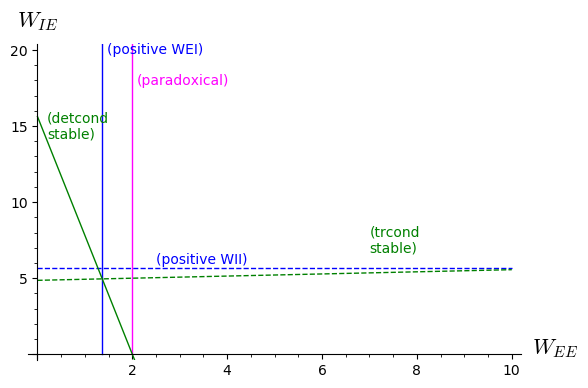

In [26]:
W_EE_max = 10
fig1 = line([[W_EE.subs(positive_WEI_cond_border_nonpdx),0],[W_EE.subs(positive_WEI_cond_border_nonpdx),50]],color='blue',linestyle='-',legend_label='positive_WEI')
fig2 = line([[0,W_IE.subs(positive_WII_cond_border_nonpdx)],[W_EE_max,W_IE.subs(positive_WII_cond_border_nonpdx)]],color='blue',linestyle='--',legend_label='positive_WEI')
fig3 = line([[W_EE.subs(paradox_cond_border_nonpdx),0],[W_EE.subs(paradox_cond_border_nonpdx),50]],color='magenta',legend_label='paradoxical')
fig4 = plot(W_IE.subs(neural_stable_detcond_v2_border_nonpdx),(W_EE,0,W_EE_max),ymin=0,color='green',linestyle='-',legend_label='neural detcond')
fig5 = plot(W_IE.subs(neural_stable_trcond_v2_border_nonpdx),(W_EE,0,W_EE_max),ymin=0,color='green',linestyle='--',legend_label='neural trcond')
tt1 = text('(positive WEI)', (0.1+W_EE.subs(positive_WEI_cond_border_nonpdx),20),color='blue',horizontal_alignment='left')
tt2 = text('(positive WII)', (2.5,0.5+W_IE.subs(positive_WII_cond_border_nonpdx)),color='blue',horizontal_alignment='left')
tt3 = text('(paradoxical)', (0.1+W_EE.subs(paradox_cond_border_nonpdx),18),color='magenta',horizontal_alignment='left')
tt4 = text('(detcond\nstable)', (0.2,15),color='green',horizontal_alignment='left')
tt5 = text('(trcond\nstable)', (7,7.5),color='green',horizontal_alignment='left')
fig = fig1 + fig2 + fig3 + fig4 + fig5 + tt1 + tt2 + tt3 + tt4 + tt5
fig.xmin(0)
fig.xmax(W_EE_max)
fig.ymin(0)
fig.ymax(20)
fig.axes_labels(['$W_{EE}$', '$W_{IE}$'])
fig.legend(False)
#fig.set_legend_options(loc='upper right')
#fig.save('neural_nonparadox_stability.pdf')
show(fig)

In the plot above the stability region of the neural subsystem (triangular area between green lines in the upper right quadrant) has a part outside the paradoxical regime (left of the magenta line) but still within the positive-W$_{EI}$ region (right of the solid blue line) and the positive-$W_{II}$ region (above the dashed blue line).

### Paradoxical effect as a function of the weights

An alternative way of seeing the paradoxical effect is to set $W_{EE}$ in the paradoxical regime and plot $E_{up}$ and $I_{up}$ as a function of the other weights:

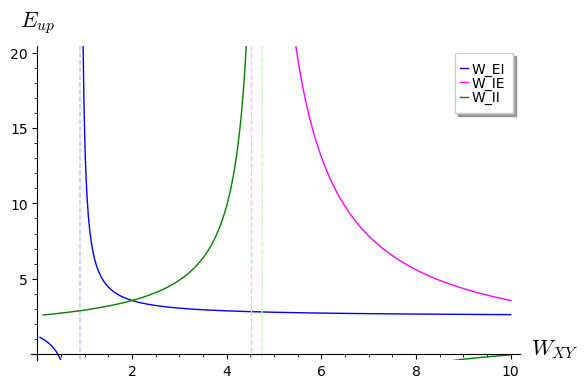

In [27]:
W_EE0 = 5 # paradoxical value (g_E=1)
W_EI0 = 2
W_IE0 = 10
W_II0 = 2
W_max = 10
E_up_WEI = E_up.rhs().subs(values_paradoxical).subs([W_EE==W_EE0,W_IE==W_IE0,W_II==W_II0])
E_up_WIE = E_up.rhs().subs(values_paradoxical).subs([W_EE==W_EE0,W_EI==W_EI0,W_II==W_II0])
E_up_WII = E_up.rhs().subs(values_paradoxical).subs([W_EE==W_EE0,W_EI==W_EI0,W_IE==W_IE0])
fig1 = plot(E_up_WEI,(W_EI,0,W_max),detect_poles='show',color='blue',legend_label='W_EI')
fig2 = plot(E_up_WIE,(W_IE,0,W_max),detect_poles='show',color='magenta',legend_label='W_IE')
fig3 = plot(E_up_WII,(W_II,0,W_max),detect_poles='show',color='green',legend_label='W_II')
# set asymptote color
for curve in fig1:
    if len(curve)==2:
        opt = curve.options()
        opt["rgbcolor"] = (0.75,0.75,1)
        curve.set_options(opt)
for curve in fig2:
    if len(curve)==2:
        opt = curve.options()
        opt["rgbcolor"] = (1,0.75,1)
        curve.set_options(opt)
for curve in fig3:
    if len(curve)==2:
        opt = curve.options()
        opt["rgbcolor"] = (0.75,1,0.75)
        curve.set_options(opt)
fig = fig1 + fig2 + fig3
fig.axes_labels(['$W_{XY}$', '$E_{up}$'])
fig.ymin(0)
fig.ymax(20)
fig.save('paradoxical_E.pdf')
show(fig)

In the plot above $E_{up}$ behaves as expected as a function of every weight.

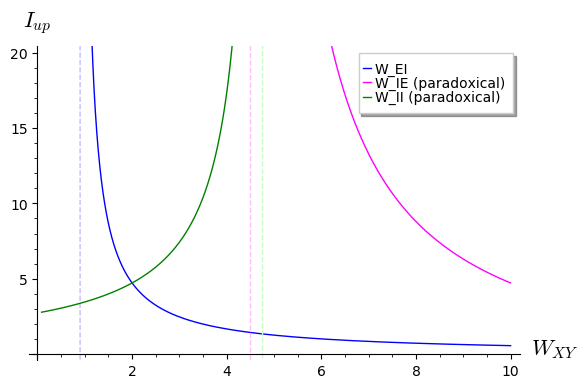

In [28]:
W_EE0 = 5 # paradoxical value (g_E=1)
W_EI0 = 2
W_IE0 = 10
W_II0 = 2
I_up_WEI = I_up.rhs().subs(values_paradoxical).subs([W_EE==W_EE0,W_IE==W_IE0,W_II==W_II0])
I_up_WIE = I_up.rhs().subs(values_paradoxical).subs([W_EE==W_EE0,W_EI==W_EI0,W_II==W_II0])
I_up_WII = I_up.rhs().subs(values_paradoxical).subs([W_EE==W_EE0,W_EI==W_EI0,W_IE==W_IE0])
fig1 = plot(I_up_WEI,(W_EI,0,W_max),detect_poles='show',color='blue',legend_label='W_EI')
fig2 = plot(I_up_WIE,(W_IE,0,W_max),detect_poles='show',color='magenta',legend_label='W_IE (paradoxical)')
fig3 = plot(I_up_WII,(W_II,0,W_max),detect_poles='show',color='green',legend_label='W_II (paradoxical)')
for curve in fig1:
    if len(curve)==2:
        opt = curve.options()
        opt["rgbcolor"] = (0.75,0.75,1)
        curve.set_options(opt)
for curve in fig2:
    if len(curve)==2:
        opt = curve.options()
        opt["rgbcolor"] = (1,0.75,1)
        curve.set_options(opt)
for curve in fig3:
    if len(curve)==2:
        opt = curve.options()
        opt["rgbcolor"] = (0.75,1,0.75)
        curve.set_options(opt)
fig = fig1 + fig2 + fig3
fig.axes_labels(['$W_{XY}$', '$I_{up}$'])
fig.set_legend_options(loc='upper right')
fig.ymin(0)
fig.ymax(20)
fig.save('paradoxical_I.pdf')
show(fig)

In the plot above $I_{up}$ decreases as a function of $W_{IE}$ and increases as a function of $W_{II}$, both unexpected.

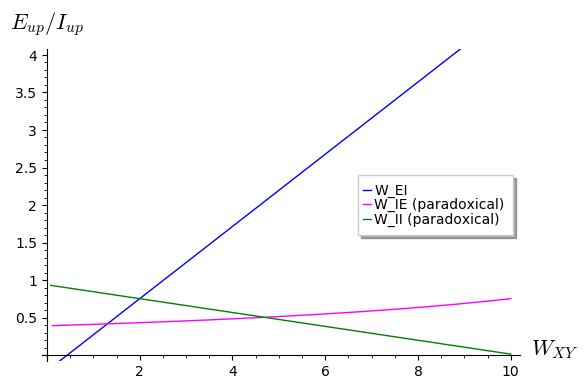

In [29]:
fig1 = plot(E_up_WEI/I_up_WEI,(W_EI,0,W_max),detect_poles='show',color='blue',legend_label='W_EI')
fig2 = plot(E_up_WIE/I_up_WIE,(W_IE,0,W_max),detect_poles='show',color='magenta',legend_label='W_IE (paradoxical)')
fig3 = plot(E_up_WII/I_up_WII,(W_II,0,W_max),detect_poles='show',color='green',legend_label='W_II (paradoxical)')
for curve in fig1:
    if len(curve)==2:
        opt = curve.options()
        opt["rgbcolor"] = (0.75,0.75,1)
        curve.set_options(opt)
for curve in fig2:
    if len(curve)==2:
        opt = curve.options()
        opt["rgbcolor"] = (1,0.75,1)
        curve.set_options(opt)
for curve in fig3:
    if len(curve)==2:
        opt = curve.options()
        opt["rgbcolor"] = (0.75,1,0.75)
        curve.set_options(opt)
fig = fig1 + fig2 + fig3
fig.axes_labels(['$W_{XY}$', '$E_{up}/I_{up}$'])
fig.set_legend_options(loc='center right')
fig.ymin(0)
fig.ymax(4)
fig.save('paradoxical_EI.pdf')
show(fig)

On the other hand, in the non-paradoxical regime $I_{up}$ behaves as expected as a function of any weight:

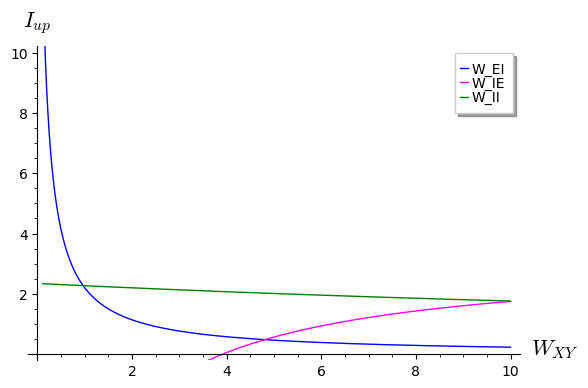

In [30]:
W_EE0 = 1.5 # nonparadoxical value (g_E=0.5)
W_EI0 = 1
W_IE0 = 15
W_II0 = 2

I_up_WEI = I_up.rhs().subs(values_nonparadoxical).subs([W_EE==W_EE0,W_IE==W_IE0,W_II==W_II0])
I_up_WIE = I_up.rhs().subs(values_nonparadoxical).subs([W_EE==W_EE0,W_EI==W_EI0,W_II==W_II0])
I_up_WII = I_up.rhs().subs(values_nonparadoxical).subs([W_EE==W_EE0,W_EI==W_EI0,W_IE==W_IE0])
fig1 = plot(I_up_WEI,(W_EI,0,W_max),detect_poles='show',color='blue',legend_label='W_EI')
fig2 = plot(I_up_WIE,(W_IE,0,W_max),detect_poles='show',color='magenta',legend_label='W_IE')
fig3 = plot(I_up_WII,(W_II,0,W_max),detect_poles='show',color='green',legend_label='W_II')
# set asymptote color
for curve in fig1:
    if len(curve)==2:
        opt = curve.options()
        opt["rgbcolor"] = (0.75,0.75,1)
        curve.set_options(opt)
for curve in fig2:
    if len(curve)==2:
        opt = curve.options()
        opt["rgbcolor"] = (1,0.75,1)
        curve.set_options(opt)
for curve in fig3:
    if len(curve)==2:
        opt = curve.options()
        opt["rgbcolor"] = (0.75,1,0.75)
        curve.set_options(opt)
fig = fig1 + fig2 + fig3
fig.axes_labels(['$W_{XY}$', '$I_{up}$'])
fig.set_legend_options(loc='upper right')
fig.ymin(0)
fig.ymax(10)
fig.save('nonparadoxical_I.pdf')
show(fig)

#### Export code
Export notebook as script for reuse in following notebooks.  
SAVE FILE FIRST!

In [31]:
!jupyter nbconvert 'upstates-Neural subsystem stability-with Iext.ipynb' --to script --output 'upstates-Neural subsystem stability-with Iext.sage'

[NbConvertApp] Converting notebook upstates-Neural subsystem stability-with Iext.ipynb to script
[NbConvertApp] Writing 23774 bytes to upstates-Neural subsystem stability-with Iext.sage.py
